# Simulador de Lanzamiento de Dados

Este notebook simula el lanzamiento de uno o más dados utilizando métodos de Monte Carlo.
Se comparan las probabilidades **simuladas** con las **probabilidades teóricas**.

## Importación de librerías y módulos

In [78]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from collections import Counter
import sys

sys.path.append("../src")
from simulador import Simulador

## Configuración de la simulación

Se definen los parámetros del experimento:
- Número de caras del dado
- Número de lanzamientos
- Número de dados

In [79]:
caras_dado = 6
nLanzamientos = 1000
nDados = 3

## Ejecución de la simulación

Se configura el simulador y se realizan los lanzamientos.

In [80]:
Simulador.dados(caras_dado, nDados)
lanzamintos = Simulador.lanzamientos(nLanzamientos)

## Funciones para el cálculo de frecuencias

In [81]:
def frecuencia_absoluta(nDados, lanzamientos):
    """
    Calcula la frecuencia absoluta de cada cara para cada dado.
    """
    resultados = {}
    for i in range(nDados):
        _, frecuencias_cara = np.unique(lanzamientos[:, i], return_counts=True)
        resultados[f"dado_{i+1}"] = frecuencias_cara
    return resultados

In [82]:
def frecuencia_relativa_dado(nLanzamientos, frecuencia):
    """
    Calcula la frecuencia relativa de cada dado.
    """
    resultados = {}
    for dado, frecuencias in frecuencia.items():
        resultados[dado] = frecuencias / nLanzamientos
    return resultados

### Frecuencia absoluta

In [83]:
frecuencia_ads = frecuencia_absoluta(nDados, lanzamintos)
frecuencia_ads

{'dado_1': array([177, 136, 175, 161, 172, 179]),
 'dado_2': array([177, 168, 178, 158, 166, 153]),
 'dado_3': array([187, 161, 178, 159, 155, 160])}

### Frecuencia relativa

In [84]:
frecuencia_rel = frecuencia_relativa_dado(nLanzamientos, frecuencia_ads)
frecuencia_rel

{'dado_1': array([0.177, 0.136, 0.175, 0.161, 0.172, 0.179]),
 'dado_2': array([0.177, 0.168, 0.178, 0.158, 0.166, 0.153]),
 'dado_3': array([0.187, 0.161, 0.178, 0.159, 0.155, 0.16 ])}

## Probabilidad teórica

Se calcula la probabilidad teórica de la suma de los dados
usando todas las combinaciones posibles.

In [85]:
def probabilidad_teorica(caras_dado=6, nDados=1):
    combinaciones = itertools.product(range(1, caras_dado + 1), repeat=nDados)
    sumas = (sum(comb) for comb in combinaciones)
    conteo = Counter(sumas)
    total_combinaciones = caras_dado**nDados
    probabilidad = {suma: conteo[suma] / total_combinaciones for suma in sorted(conteo)}
    return probabilidad

## Probabilidad simulada

In [86]:
def frecuencia_relativa(lanzamintos):
    sumas = (sum(comb) for comb in lanzamintos)
    conteo = Counter(sumas)
    total_combinaciones = len(lanzamintos)
    probabilidad = {suma: conteo[suma] / total_combinaciones for suma in sorted(conteo)}
    return probabilidad

## Comparación gráfica de probabilidades

In [87]:
def crear_grafica(prob_teorica, prob_simulada, tiradas, nDados, caras_dado):
    path = f"../results/Grafico_barras_{tiradas}.png"
    x = list(prob_teorica.keys())
    ancho = 0.4
    plt.figure(figsize=(10, 6))
    plt.bar(np.array(x) - ancho / 2, prob_teorica.values(), ancho, label="Teórica")
    plt.bar(
        np.array(x) + ancho / 2,
        list(prob_simulada.get(i, 0) for i in x),
        ancho,
        label="Simulada",
    )
    plt.xlabel("Suma")
    plt.ylabel("Probabilidad")
    plt.title(
        f"Comparación de Probabilidades Teóricas y Simuladas de {tiradas} tiradas de {nDados} dados de {caras_dado} caras cada"
    )
    plt.legend()
    plt.savefig(path)
    plt.show()
    plt.close()

## Función para imprimir resultados

In [88]:
def imprimir_resultados(probabilidad):
    for suma, p in probabilidad.items():
        print(f"Suma {suma}: {p:.4f}")

## Probabilidad teórica de la suma de los dados

Se muestran las probabilidades teóricas de cada posible suma,
calculadas a partir de todas las combinaciones posibles.

In [89]:
prob_teorica = probabilidad_teorica(caras_dado, nDados)
imprimir_resultados(prob_teorica)

Suma 3: 0.0046
Suma 4: 0.0139
Suma 5: 0.0278
Suma 6: 0.0463
Suma 7: 0.0694
Suma 8: 0.0972
Suma 9: 0.1157
Suma 10: 0.1250
Suma 11: 0.1250
Suma 12: 0.1157
Suma 13: 0.0972
Suma 14: 0.0694
Suma 15: 0.0463
Suma 16: 0.0278
Suma 17: 0.0139
Suma 18: 0.0046


## Simulación con 10 lanzamientos

Se realiza una simulación con un número pequeño de lanzamientos
para observar la variabilidad de los resultados.

In [ ]:
Simulador.dados(caras_dado, nDados)
tiradas = 10
lanzamintos = Simulador.lanzamientos(tiradas)

fr10 = frecuencia_relativa(lanzamintos)
imprimir_resultados(fr10)

Suma 7: 0.3000
Suma 10: 0.1000
Suma 11: 0.2000
Suma 12: 0.1000
Suma 13: 0.2000
Suma 17: 0.1000


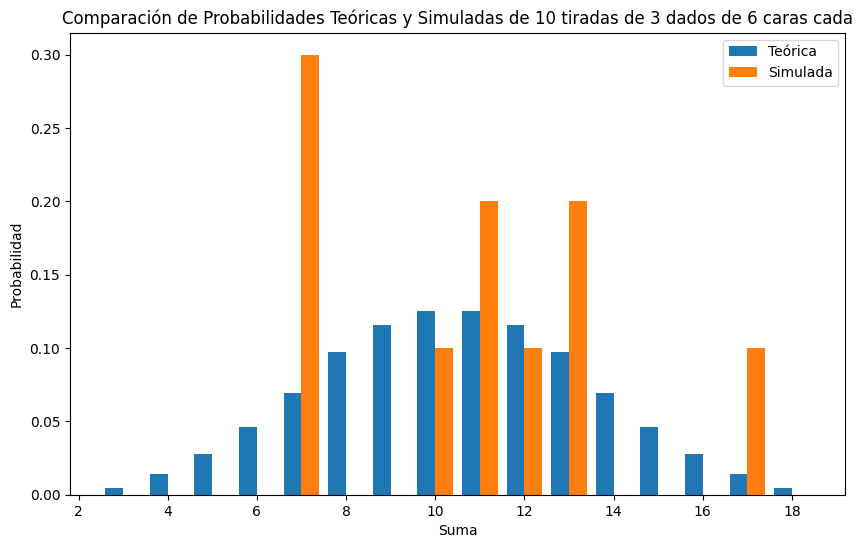

In [91]:
crear_grafica(prob_teorica, fr10, tiradas, nDados, caras_dado)

### Análisis: El efecto del tamaño de la muestra

En este gráfico comparamos lo que debería pasar (Teórica - Azul) contra lo que realmente pasó en un experimento corto de solo 10 tiradas (Simulada - Naranja).

**¿Qué estamos observando?**

- **Las barras azules son fijas:** Representan la matemática pura. Siempre tendrán esa forma de "campana" perfecta.
- **Las barras naranjas son volátiles:** Representan el azar del momento. Al ser solo 10 lanzamientos, la gráfica se ve "rota" o incompleta.
    - Vemos picos exagerados (falsos positivos de tendencias).
    - Vemos huecos donde no hay barras naranjas (eventos que no sucedieron por azar).

**Interpretación:**
Esta gráfica ilustra la **varianza muestral.** Si corres esta celda nuevamente, las barras naranjas cambiarán de posición y altura aleatoriamente, pero las azules seguirán igual. Esto nos enseña que **no podemos confiar en estadísticas derivadas de muy pocos datos,** ya que no reflejan la realidad subyacente del sistema. Para que las barras naranjas se igualen a las azules, necesitaríamos aumentar drásticamente el número de lanzamientos.

## Simulación con 100 lanzamientos

Al aumentar el número de lanzamientos, los resultados simulados
comienzan a aproximarse a los valores teóricos.

In [92]:
Simulador.dados(caras_dado, nDados)
tiradas = 100
lanzamintos = Simulador.lanzamientos(tiradas)

fr100 = frecuencia_relativa(lanzamintos)
imprimir_resultados(fr100)

Suma 3: 0.0100
Suma 4: 0.0100
Suma 5: 0.0100
Suma 6: 0.0500
Suma 7: 0.1100
Suma 8: 0.1400
Suma 9: 0.0600
Suma 10: 0.1300
Suma 11: 0.1300
Suma 12: 0.1400
Suma 13: 0.0800
Suma 14: 0.0500
Suma 15: 0.0800


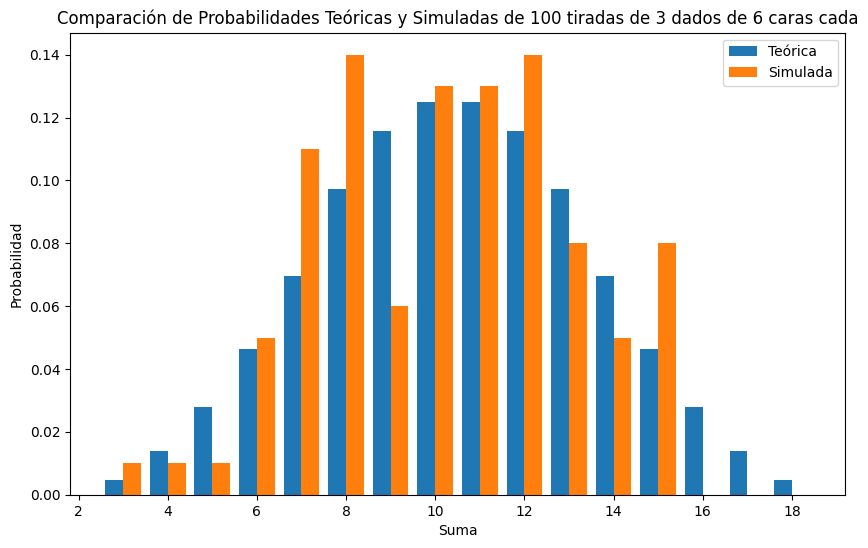

In [93]:
crear_grafica(prob_teorica, fr100, tiradas, nDados, caras_dado)

### Análisis: ¿Qué cambia con 100 lanzamientos?

En esta segunda fase del experimento, multiplicamos por 10 nuestros datos. La gráfica nos cuenta una historia de **aproximación:**

- **Menos huecos:** Ya no vemos tantos espacios vacíos como en la primera parte. La mayoría de las sumas posibles han ocurrido al menos una vez.
- **La forma empieza a tener sentido:** Si entrecierras los ojos, verás que las barras naranjas intentan formar una montaña en el centro, similar a las azules. Ya no es un gráfico totalmente aleatorio.
- **Todavía hay "trampas" del azar:** Observa cómo algunas barras naranjas son mucho más altas o bajas de lo que deberían (por ejemplo, mira la diferencia entre la suma 8 y la 9 en esta corrida).

**Nota sobre la reproducibilidad:**
Si vuelves a ejecutar esta celda, las barras naranjas cambiarán de nuevo. Algunas veces se ajustarán mejor a las azules y otras veces peor. Con 100 lanzamientos, hemos reducido la incertidumbre, pero **todavía no tenemos suficientes datos** para garantizar que la simulación sea un espejo perfecto de la teoría matemática.

## Simulación con 1,000,000 de lanzamientos

Con un número grande de lanzamientos, la probabilidad simulada
converge a la probabilidad teórica (Ley de los Grandes Números).

In [94]:
Simulador.dados(caras_dado, nDados)
tiradas = 1000000
lanzamintos = Simulador.lanzamientos(tiradas)

fr1000000 = frecuencia_relativa(lanzamintos)
imprimir_resultados(fr1000000)

Suma 3: 0.0046
Suma 4: 0.0137
Suma 5: 0.0274
Suma 6: 0.0464
Suma 7: 0.0695
Suma 8: 0.0974
Suma 9: 0.1158
Suma 10: 0.1253
Suma 11: 0.1251
Suma 12: 0.1158
Suma 13: 0.0974
Suma 14: 0.0693
Suma 15: 0.0462
Suma 16: 0.0276
Suma 17: 0.0138
Suma 18: 0.0047


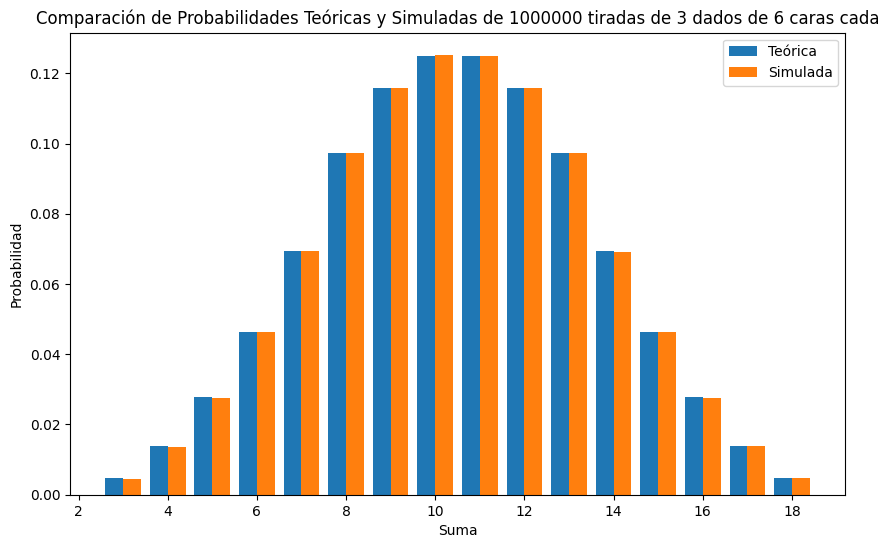

In [95]:
crear_grafica(prob_teorica, fr1000000, tiradas, nDados, caras_dado)

### Análisis: El triunfo de la Estadística

¡Lo hemos logrado! Al realizar 1,000,000 de lanzamientos, la gráfica simulada (naranja) se ha convertido en un espejo casi perfecto de la gráfica teórica (azul).

**¿Qué nos dice esta imagen?**

- Adiós al azar (aparente): Aunque seguimos lanzando dados aleatorios, la cantidad masiva de datos ha suavizado todas las irregularidades. Ya no hay picos extraños ni huecos vacíos.
- Precisión milimétrica: Observa los resultados numéricos. La teoría dice que la suma de 10 debe salir un *12.50%* de las veces. Nuestra simulación obtuvo un *12.53%.* La diferencia es mínima.
- Los extremos existen: Ahora podemos ver con claridad las barras pequeñitas de los extremos (3 y 18). En los intentos anteriores era difícil "pescar" estos resultados, pero con un millón de intentos, aparecen con la frecuencia exacta que predice la matemática.

**Nota sobre la ejecución:**
Si corres esta celda de nuevo, los números cambiarán ligeramente (en los decimales), pero **la gráfica se verá idéntica.** Hemos alcanzado un punto de **estabilidad.** Ya no necesitamos más lanzamientos para entender el comportamiento de los dados; hemos dominado la incertidumbre a través del volumen de datos.

## Conclusiones

A lo largo de este notebook se desarrolló una simulación de lanzamientos de dados utilizando métodos de Monte Carlo, con el objetivo de comparar las probabilidades **teóricas** con las **simuladas** bajo distintos tamaños de muestra.

Los resultados permiten extraer las siguientes conclusiones:

- Cuando el número de lanzamientos es muy pequeño (10 tiradas), los resultados simulados presentan una alta variabilidad y no reflejan adecuadamente el comportamiento teórico del sistema. Esto se debe a la **varianza muestral**, propia de muestras reducidas.

- Al aumentar el número de lanzamientos a 100, la simulación comienza a mostrar una forma más cercana a la distribución teórica. Sin embargo, todavía se observan desviaciones significativas producto del azar, lo que indica que la muestra sigue siendo insuficiente para obtener estimaciones confiables.

- Con 1,000,000 de lanzamientos, la distribución simulada converge prácticamente a la distribución teórica. Las diferencias observadas son mínimas y se explican únicamente por el error estadístico residual.

Este comportamiento confirma empíricamente la **Ley de los Grandes Números**, la cual establece que, a medida que aumenta el tamaño de la muestra, los resultados experimentales tienden a aproximarse al valor esperado teórico.

En conclusión, la simulación demuestra que el azar no desaparece, pero puede ser controlado mediante el uso de grandes volúmenes de datos, permitiendo modelar con alta precisión fenómenos probabilísticos mediante simulación computacional.